In [44]:
import import_ipynb
import GetMatchData as gmd
import BrowserConfig as bc
import CommonMethods as cm
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [6]:
#initialize browser
driver = bc.initialize_browser()
    
#DataFrame for all the match data
match_data = pd.DataFrame(columns=['Teams', 'ToG', 'ToSh','AG','ASh','CeG','CeSh', 'EXG','EXSh','6mG','6mSh','PG',
                                       'PSh','CoG','CoSh','PSOG','PSOSh','As','To','St','Bl','SpW','Sp','ExCe','ExF',
                                       'DoEx','P','ExFin','Ex4min'])

#Getting all data from the Preliminary Round
gmd.get_match_data(driver, match_data, "optionA01")
print(match_data)

#Getting all data from the Final 8
gmd.get_match_data(driver, match_data, "optionSIX")
print(match_data)

#Closing and quiting the driver
driver.quit()

#saving the data in .csv file
match_data.to_csv("match_data.csv", encoding = "utf-8")

                  Teams  ToG  ToSh  AG  ASh  CeG  CeSh  EXG  EXSh  6mG  ...  \
0    OLYMPIACOS PIRAEUS    9    29   5   20    1     3    2     5    0  ...   
1             PRO RECCO    7    31   1   18    0     0    4    10    0  ...   
2           VK RADNICKI    9    27   2    8    2     5    4     9    1  ...   
3        NC VOULIAGMENI    9    27   4   14    0     1    2     5    1  ...   
4        DINAMO TBILISI    8    20   1    3    2     3    5     8    0  ...   
..                  ...  ...   ...  ..  ...  ...   ...  ...   ...  ...  ...   
219         VK RADNICKI   10    30   1   16    3     3    3     4    1  ...   
220         ZODIAC CNAB   13    18   8   11    1     1    1     2    0  ...   
221      DINAMO TBILISI    6    14   3   10    0     1    3     3    0  ...   
222        JADRAN SPLIT   12    29   4   10    1     2    1     4    2  ...   
223    WASPO98 HANNOVER    8    30   3   13    0     3    3     7    1  ...   

     St  Bl  SpW  Sp  ExCe  ExF  DoEx  P  ExFin  Ex

In [3]:
#Reading the .csv file 
match_csv = pd.read_csv("match_data.csv")
match_csv = match_csv.drop(columns=['Unnamed: 0'])

#separatig data by Preliminary Round and Final 8
preliminary_round = match_csv.loc[range(224)]
final_8 = match_csv.loc[range(224, len(match_csv))]

#Getting team list
teams = []
for row in range(len(match_csv)):
    if match_csv.loc[row]['Teams'] not in teams:
        teams.append(match_csv.loc[row]['Teams'])


In [4]:
#Showing info about .csv file
print('\033[1m' + 'Informacije o .csv fajlu:'+ '\033[0m')
print(match_csv.info())

Informacije o .csv fajlu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Teams   248 non-null    object
 1   ToG     248 non-null    int64 
 2   ToSh    248 non-null    int64 
 3   AG      248 non-null    int64 
 4   ASh     248 non-null    int64 
 5   CeG     248 non-null    int64 
 6   CeSh    248 non-null    int64 
 7   EXG     248 non-null    int64 
 8   EXSh    248 non-null    int64 
 9   6mG     248 non-null    int64 
 10  6mSh    248 non-null    int64 
 11  PG      248 non-null    int64 
 12  PSh     248 non-null    int64 
 13  CoG     248 non-null    int64 
 14  CoSh    248 non-null    int64 
 15  PSOG    248 non-null    int64 
 16  PSOSh   248 non-null    int64 
 17  As      248 non-null    int64 
 18  To      248 non-null    int64 
 19  St      248 non-null    int64 
 20  Bl      248 non-null    int64 
 21  SpW     248 non-null    int64 
 22  

In [5]:
#All teams that participated
print('\n\033[1m' + 'Svi timovi koji su učestvovali u Ligi Šampiona:'+ '\033[0m')
for t in sorted(teams):
    print("\t"+t)


Svi timovi koji su učestvovali u Ligi Šampiona:
	AN BRESCIA
	ASTRALPOOL SABADELL
	CN MARSEILLE
	DINAMO TBILISI
	FTC TELEKOM BUDAPEST
	GENESYS OSC BUDAPEST
	JADRAN SPLIT
	JUG ADRIATIC OSIG.
	NC VOULIAGMENI
	OLYMPIACOS PIRAEUS
	PRO RECCO
	SPANDAU 04 BERLIN
	VK NOVI BEOGRAD
	VK RADNICKI
	WASPO98 HANNOVER
	ZODIAC CNAB


In [399]:
#Data group by teams
print('\n\033[1m' + 'Podaci grupisani po timovima:'+ '\033[0m')
grouped_data = match_csv.rename(columns={'Teams': 'Timovi'}).groupby('Timovi').sum()
#grouped_data.to_csv("grouped_data.csv", encoding = "utf-8")
grouped_data


Podaci grupisani po timovima:


,ToG,ToSh,AG,ASh,CeG,CeSh,EXG,EXSh,6mG,6mSh,...,St,Bl,SpW,Sp,ExCe,ExF,DoEx,P,ExFin,Ex4min
Timovi,,,,,,,,,,,,,,,,,,,,,
AN BRESCIA,197,385,74,132,6,18,86,137,18,75,...,45,18,44,53,166,36,3,24,26,0
ASTRALPOOL SABADELL,131,330,29,79,7,18,55,101,29,118,...,67,34,29,55,98,61,4,12,14,0
CN MARSEILLE,146,235,47,78,5,10,72,103,8,28,...,23,12,21,51,108,45,1,16,15,0
DINAMO TBILISI,115,335,22,92,10,35,46,99,25,91,...,48,31,20,53,74,43,2,26,14,0
FTC TELEKOM BUDAPEST,165,407,46,157,9,24,79,135,13,68,...,70,55,36,64,135,53,2,14,13,0
GENESYS OSC BUDAPEST,143,321,39,119,8,17,70,122,10,38,...,56,25,21,55,121,58,4,18,20,0
JADRAN SPLIT,142,372,46,139,11,29,46,110,16,68,...,58,45,34,51,93,53,1,8,9,0
JUG ADRIATIC OSIG.,184,420,52,143,16,38,82,162,11,46,...,69,39,15,59,156,55,1,23,26,0
NC VOULIAGMENI,158,461,38,150,20,47,51,115,21,118,...,95,34,17,66,131,65,3,17,22,0


In [7]:
#Team with most goals in Preliminary Round
print('\n\033[1m' + 'Tim koji je dao najviše golova u Grupnoj fazi:'+ '\033[0m')
grouped_prelim = preliminary_round.rename(columns={'Teams': 'Timovi'}).groupby('Timovi').sum()
grouped_prelim.loc[grouped_prelim['ToG'] == grouped_prelim['ToG'].max()][['ToG']].rename(columns={'ToG': 'Ukupno golovi'})


Tim koji je dao najviše golova u Grupnoj fazi:


,Ukupno golovi
Timovi,
PRO RECCO,192


In [8]:
#Team with most goals in Final 8
print('\n\033[1m' + 'Tim koji je dao najviše golova u Final 8-u:'+ '\033[0m')
grouped_fin8 = final_8.rename(columns={'Teams': 'Timovi'}).groupby('Timovi').sum()
grouped_fin8.loc[grouped_fin8['ToG'] == grouped_fin8['ToG'].max()][['ToG']].rename(columns={'ToG': 'Ukupno golovi'})


Tim koji je dao najviše golova u Final 8-u:


,Ukupno golovi
Timovi,
OLYMPIACOS PIRAEUS,34
PRO RECCO,34


In [9]:
#Most efficient team in Preliniary Round
print('\n\033[1m' + 'Najefikasniji tim u Grupnoj fazi:'+ '\033[0m')
eff_t = grouped_prelim.loc[(grouped_prelim['ToG']/grouped_prelim['ToSh']) == (grouped_prelim['ToG']/grouped_prelim['ToSh']).max()][['ToG','ToSh']]
eff_stat = (grouped_prelim['ToG']/grouped_prelim['ToSh']).max()
eff_t.insert(len(eff_t.index)+1, 'Total efficiency', str(round(eff_stat * 100, 1)) + '%')
eff_t.rename(columns={'ToG': 'Ukupno golovi', 'ToSh':'Ukupno šutevi'})


Najefikasniji tim u Grupnoj fazi:


,Ukupno golovi,Ukupno šutevi,Total efficiency
Timovi,,,
CN MARSEILLE,146,235,62.1%


In [341]:
#Most efficient team from extra player in Final 8
print('\n\033[1m' + 'Najefikasniji tim iz igrača više u Final 8-u:'+ '\033[0m')
eff_t = grouped_fin8.loc[(grouped_fin8['EXG']/grouped_fin8['EXSh']) == (grouped_fin8['EXG']/grouped_fin8['EXSh']).max()][['EXG','EXSh']]
eff_stat = (grouped_fin8['EXG']/grouped_fin8['EXSh']).max()
eff_t.insert(len(eff_t.index)+1, 'Efikasnost iz igrača više', str(round(eff_stat * 100, 1)) + '%')
eff_t.rename(columns={'EXG': 'Golovi iz igrača više', 'EXSh':'Šutevi iz igrača više'})


Najefikasniji tim iz igrača više u Final 8-u:


,Golovi iz igrača više,Šutevi iz igrača više,Efikasnost iz igrača više
Timovi,,,
VK NOVI BEOGRAD,17,28,60.7%


In [342]:
#Least efficient team from extra player in Preliminary round
print('\n\033[1m' + 'Tim koji je bio najmanje efikasan iz igrača više u Grupnoj fazi:'+ '\033[0m')
eff_t = grouped_prelim.loc[(grouped_prelim['EXG']/grouped_prelim['EXSh']) == (grouped_prelim['EXG']/grouped_prelim['EXSh']).min()][['EXG','EXSh']]
eff_stat = (grouped_prelim['EXG']/grouped_prelim['EXSh']).min()
eff_t.insert(len(eff_t.index)+1, 'Efikasnost iz igrača više', str(round(eff_stat * 100, 1)) + '%')
eff_t.rename(columns={'EXG': 'Golovi iz igrača više', 'EXSh':'Šutevi iz igrača više'})


Tim koji je bio najmanje efikasan iz igrača više u Grupnoj fazi:


,Golovi iz igrača više,Šutevi iz igrača više,Efikasnost iz igrača više
Timovi,,,
JADRAN SPLIT,46,110,41.8%


In [12]:
#Team with most blocks and steals in one game
print('\n\033[1m' + 'Tim koji je imao najviše oduzetih lopti i blokova na jednoj utakmici:'+ '\033[0m')
stock_t = match_csv.loc[(match_csv['St']+match_csv['Bl']) == (match_csv['St']+match_csv['Bl']).max()][['Teams', 'ToG','St','Bl']]

opp = []
opp_g = []
for i in stock_t.index:
    if(i%2 == 0):
        opp.append(match_csv.loc[i+1]['Teams'])
        opp_g.append(match_csv.loc[i+1]['ToG'])
    else:
        opp.append(match_csv.loc[i-1]['Teams'])
        opp_g.append(match_csv.loc[i-1]['ToG'])

stock_t.insert(1, 'Protivnik', opp)
stock_t.insert(3, 'Primljeni golovi', opp_g)
stock_t.insert(6, 'Ukupno', (stock_t['St']+stock_t['Bl']))
stock_t.rename(columns = {'Teams': 'Tim', 'St':'Oduzete lopte', 'Bl' : 'Blokovi', 'ToG':'Dati golovi'}).groupby('Tim').sum()


Tim koji je imao najviše oduzetih lopti i blokova na jednoj utakmici:


,Protivnik,Dati golovi,Primljeni golovi,Oduzete lopte,Blokovi,Ukupno
Tim,,,,,,
JADRAN SPLIT,DINAMO TBILISI,21,7,13,5,18
OLYMPIACOS PIRAEUS,PRO RECCO,9,7,3,15,18


In [13]:
#Team with most blocks and steals in one game
print('\n\033[1m' + 'Prosek napravljenih prekršaja na utakmicama:'+ '\033[0m')
ex_mean = match_csv.loc[range(len(match_csv.index)),'ExCe':'P'].mean()
ex_mean.rename({'ExCe':'Isključenja sa centarskoj poziciji', 'ExF':'Isključenja na terenu', 'DoEx':'Obostrano isključenje', 'P':'Napravljeni penali'})


Prosek napravljenih prekršaja na utakmicama:


Isključenja sa centarskoj poziciji    7.516129
Isključenja na terenu                 3.383065
Obostrano isključenje                 0.112903
Napravljeni penali                    1.145161
dtype: float64

In [346]:
#Descriptive analisys of given goals
print('\n\033[1m' + 'Osnovna statistika o napadu:'+ '\033[0m')
att_desc = match_csv.loc[range(len(match_csv.index)),'ToG':'PSh'].describe()
att_desc


Osnovna statistika o napadu:


,ToG,ToSh,AG,ASh,CeG,CeSh,EXG,EXSh,6mG,6mSh,PG,PSh
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,10.411290,24.088710,3.173387,8.608871,0.717742,1.750000,4.193548,7.592742,1.141129,4.620968,0.891129,1.120968
std,3.481616,8.531449,2.459012,5.378417,0.957058,1.664709,1.961894,3.089663,1.408563,4.641989,0.939594,1.053951
min,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,19.000000,1.000000,5.000000,0.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,27.000000,3.000000,8.000000,0.000000,1.000000,4.000000,8.000000,1.000000,4.000000,1.000000,1.000000
75%,13.000000,30.000000,5.000000,12.250000,1.000000,3.000000,6.000000,10.000000,2.000000,8.000000,1.000000,2.000000
max,21.000000,39.000000,14.000000,22.000000,5.000000,7.000000,10.000000,17.000000,6.000000,18.000000,4.000000,5.000000


In [347]:
#Descriptive analisys of given goals cleaned data
print('\n\033[1m' + 'Osnovna statistika o napadu sa čišćenim podacima:'+ '\033[0m')
att_clean = match_csv.drop([186,187,202,203])
indexes = [i for i in range(len(att_clean.index)) if i!=203 and i!=202 and i!=186 and i!=187]
att_clean.loc[indexes,'ToG':'PSh'].describe()


Osnovna statistika o napadu sa čišćenim podacima:


,ToG,ToSh,AG,ASh,CeG,CeSh,EXG,EXSh,6mG,6mSh,PG,PSh
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000
mean,10.512500,24.304167,3.254167,8.800000,0.733333,1.770833,4.179167,7.60000,1.150000,4.595833,0.891667,1.129167
std,3.427652,8.209291,2.454179,5.331049,0.965803,1.672314,1.984559,3.05569,1.385218,4.578372,0.935545,1.052981
min,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,19.750000,1.000000,5.000000,0.000000,0.000000,3.000000,5.00000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,27.000000,3.000000,8.000000,0.000000,1.000000,4.000000,8.00000,1.000000,4.000000,1.000000,1.000000
75%,13.000000,30.000000,5.000000,13.000000,1.000000,3.000000,6.000000,10.00000,2.000000,8.000000,1.000000,2.000000
max,21.000000,39.000000,14.000000,22.000000,5.000000,7.000000,10.000000,17.00000,6.000000,18.000000,4.000000,5.000000


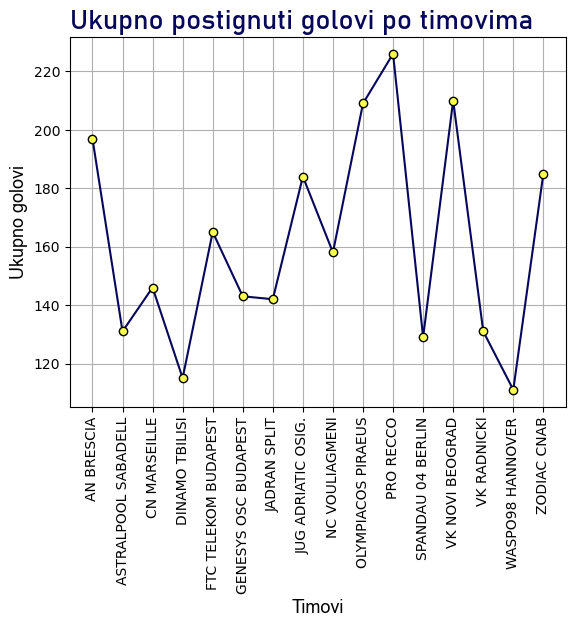

In [365]:
#Plot for total goals from all teams
font1 = {'family':'Bahnschrift', 'color':'#06065A', 'size':'20'}
font2 = {'family':'Arial CE', 'size':'13'}

goals_x = grouped_data.index
goals_y = grouped_data['ToG']
goals_plot = plt
#goals_plot.figure(figsize=(6,12))
goals_plot.plot(goals_x, goals_y, c='#06065A', marker='o', mec='k', mfc='#FAFF4C')
goals_plot.xticks(rotation = 90)
goals_plot.xlabel('Timovi', fontdict = font2)
goals_plot.ylabel('Ukupno golovi',fontdict = font2)
goals_plot.title('Ukupno postignuti golovi po timovima', fontdict = font1, loc='left')
goals_plot.grid()

goals_plot.show()


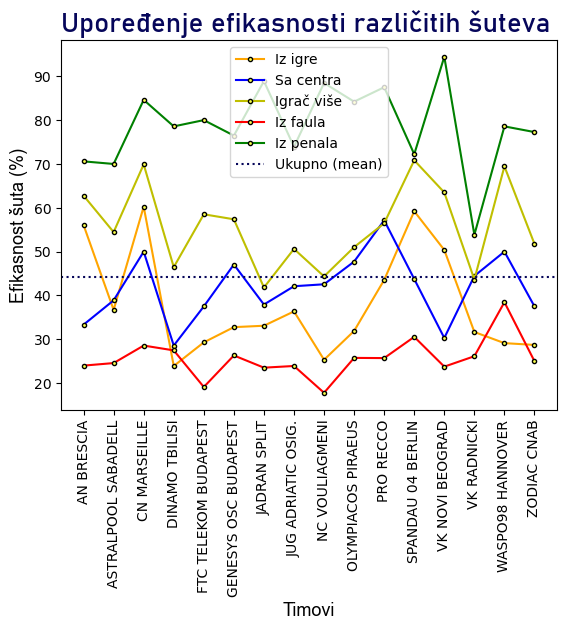

In [370]:
#Plot for efficiency of shots taken

eff_x = grouped_data.index
eff_y1 = grouped_data['AG']/grouped_data['ASh']*100
eff_y2 = grouped_data['CeG']/grouped_data['CeSh']*100
eff_y3 = grouped_data['EXG']/grouped_data['EXSh']*100
eff_y4 = grouped_data['6mG']/grouped_data['6mSh']*100
eff_y5 = grouped_data['PG']/grouped_data['PSh']*100
eff_y6 = (grouped_data['ToG']/grouped_data['ToSh']*100).mean()

eff_goals = plt
eff_goals.plot(eff_x,eff_y1, "orange", label='Iz igre', marker='.', mec='k', mfc='#FAFF4C')
eff_goals.plot(eff_x,eff_y2, "b", label='Sa centra', marker='.', mec='k', mfc='#FAFF4C')
eff_goals.plot(eff_x,eff_y3, "y", label='Igrač više', marker='.', mec='k', mfc='#FAFF4C')
eff_goals.plot(eff_x,eff_y4, "r",label='Iz faula', marker='.', mec='k', mfc='#FAFF4C')
eff_goals.plot(eff_x,eff_y5, "g",label='Iz penala', marker='.', mec='k', mfc='#FAFF4C')
eff_goals.axhline(eff_y6, linestyle=":",c="#06065A", label='Ukupno (mean)')
eff_goals.xticks(rotation = 90)
eff_goals.xlabel('Timovi', fontdict = font2)
eff_goals.ylabel('Efikasnost šuta (%)',fontdict = font2)
eff_goals.title('Upoređenje efikasnosti različitih šuteva', fontdict = font1, loc='left')
#eff_goals.grid()
eff_goals.legend()
eff_goals.show()

In [159]:
def get_opponent(team_match):
    #opp = pd.DataFrame(columns=list(match_csv.columns))
    opp = []
    for i in team_match.index:
        if(i%2 == 0):
            #opp.loc[len(opp.index)]=match_csv.loc[i+1]
            opp.append(match_csv.loc[i+1]['Teams'])
        else:
            #opp.loc[len(opp.index)]=match_csv.loc[i-1]
            opp.append(match_csv.loc[i-1]['Teams'])

    #print(opp)
    return opp

In [340]:
teams_fin=[]
for k in range(1,5):
    teams_fin.append(match_csv.loc[len(match_csv.index)-k]['Teams'])
#print(teams_fin)

team1 = match_csv.loc[match_csv['Teams']==teams_fin[0]]
team2 = match_csv.loc[match_csv['Teams']==teams_fin[1]]
team3 = match_csv.loc[match_csv['Teams']==teams_fin[2]]
team4 = match_csv.loc[match_csv['Teams']==teams_fin[3]]
#print(team1, team2, team3,team4)

team1.insert(len(list(team1.columns)), 'Opp', get_opponent(team1))
team2.insert(len(list(team2.columns)), 'Opp', get_opponent(team2))
team3.insert(len(list(team3.columns)), 'Opp', get_opponent(team3))
team4.insert(len(list(team4.columns)), 'Opp', get_opponent(team4))

team1_opp =team1.groupby('Opp').sum()
team2_opp =team2.groupby('Opp').sum()
team3_opp =team3.groupby('Opp').sum()
team4_opp =team4.groupby('Opp').sum()
#print(team1, team2, team3,team4)   

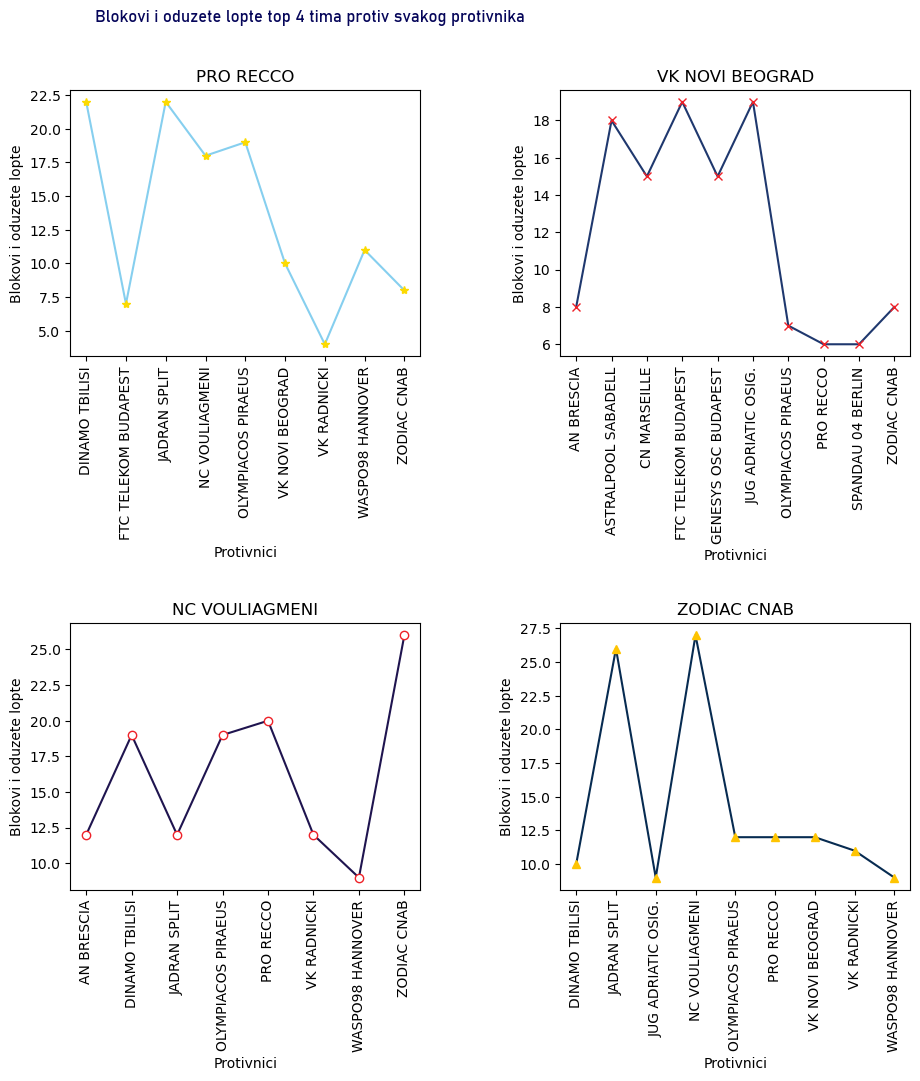

In [363]:
#Steals and blocks fro teams from final4
fin4 = plt
fin4.figure(figsize=(6,10))
fin4.subplot(2,2,1)
fin4.plot(team1_opp.index, team1_opp['Bl']+team1_opp['St'], c='#86cfef', marker='*',mec='#fcda01', mfc='#fcda01')
#fin4.axhline((grouped_data['St']+grouped_data['Bl']).mean(), linestyle=":",c="#06065A", label='Ukupno (mean)')
fin4.xlabel('Protivnici')
fin4.ylabel('Blokovi i oduzete lopte')
fin4.xticks(rotation = 90)
fin4.title('PRO RECCO')

fin4.subplot(2,2,2)
fin4.plot(team2_opp.index, team2_opp['Bl']+team2_opp['St'], c='#1f386e', marker='x',mec='#ee2128', mfc='#ee2128')
fin4.xlabel('Protivnici')
fin4.ylabel('Blokovi i oduzete lopte')
fin4.xticks(rotation = 90)
fin4.title('VK NOVI BEOGRAD')

fin4.subplot(2,2,3)
fin4.plot(team3_opp.index, team3_opp['Bl']+team3_opp['St'], c='#1f144f', marker='o',mec='#ee2128', mfc='w')
fin4.xlabel('Protivnici')
fin4.ylabel('Blokovi i oduzete lopte')
fin4.xticks(rotation = 90)
fin4.title('NC VOULIAGMENI')

fin4.subplot(2,2,4)
fin4.plot(team4_opp.index, team4_opp['Bl']+team4_opp['St'], c='#072b51', marker='^',mec='#fec401', mfc='#fec401')
fin4.xlabel('Protivnici')
fin4.ylabel('Blokovi i oduzete lopte')
fin4.xticks(rotation = 90)
fin4.title('ZODIAC CNAB')

fin4.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=1)

fin4.suptitle('Blokovi i oduzete lopte top 4 tima protiv svakog protivnika', fontdict=font1)
fin4.show()


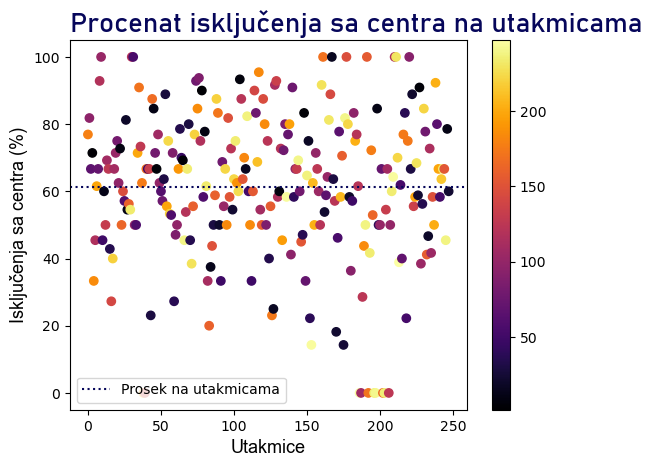

In [373]:
#Scatter plot of precentage of centre exlousion
ex_ce = plt
ex_x = match_csv.index
ex_y = match_csv['ExCe']/(match_csv['ExF']+match_csv['ExCe']+match_csv['DoEx']+match_csv['P'])*100
ex_y_mean = (match_csv['ExCe']/(match_csv['ExF']+match_csv['ExCe']+match_csv['DoEx']+match_csv['P'])*100).mean()

colors = np.random.randint(248, size=(248)) #list(range(248))

ex_ce.scatter(ex_x, ex_y, c=colors, cmap='inferno')
ex_ce.axhline(ex_y_mean, linestyle=":",c="#06065A", label='Prosek na utakmicama')

ex_ce.colorbar()
ex_ce.xlabel('Utakmice', fontdict = font2)
ex_ce.ylabel('Isključenja sa centra (%)',fontdict = font2)
ex_ce.title('Procenat isključenja sa centra na utakmicama', fontdict = font1, loc='left')
ex_ce.legend()

ex_ce.show()

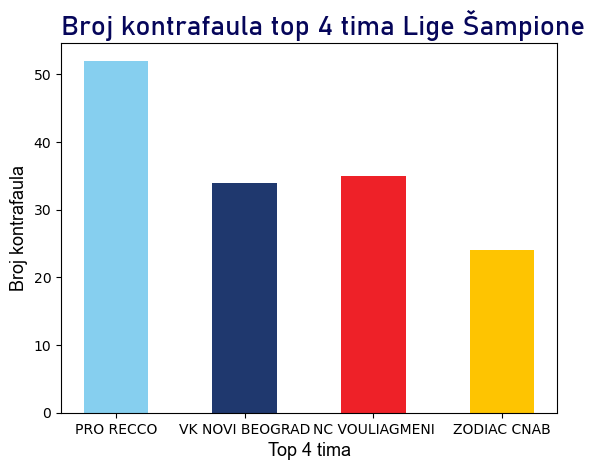

In [398]:
#Plot for tournover fouls of top 4
tofoul = plt
#print(teams_fin)
to_x = teams_fin
to_y = np.array([team1['To'].sum(), team2['To'].sum(), team3['To'].sum(), team4['To'].sum()])
colors = ['#86cfef', '#1f386e', '#ee2128','#fec401']
plt.bar(to_x, to_y, color = colors, width = 0.5)
ex_ce.xlabel('Top 4 tima', fontdict = font2)
ex_ce.ylabel('Broj kontrafaula',fontdict = font2)
ex_ce.title('Broj kontrafaula top 4 tima Lige Šampione', fontdict = font1, loc='left')
plt.show()

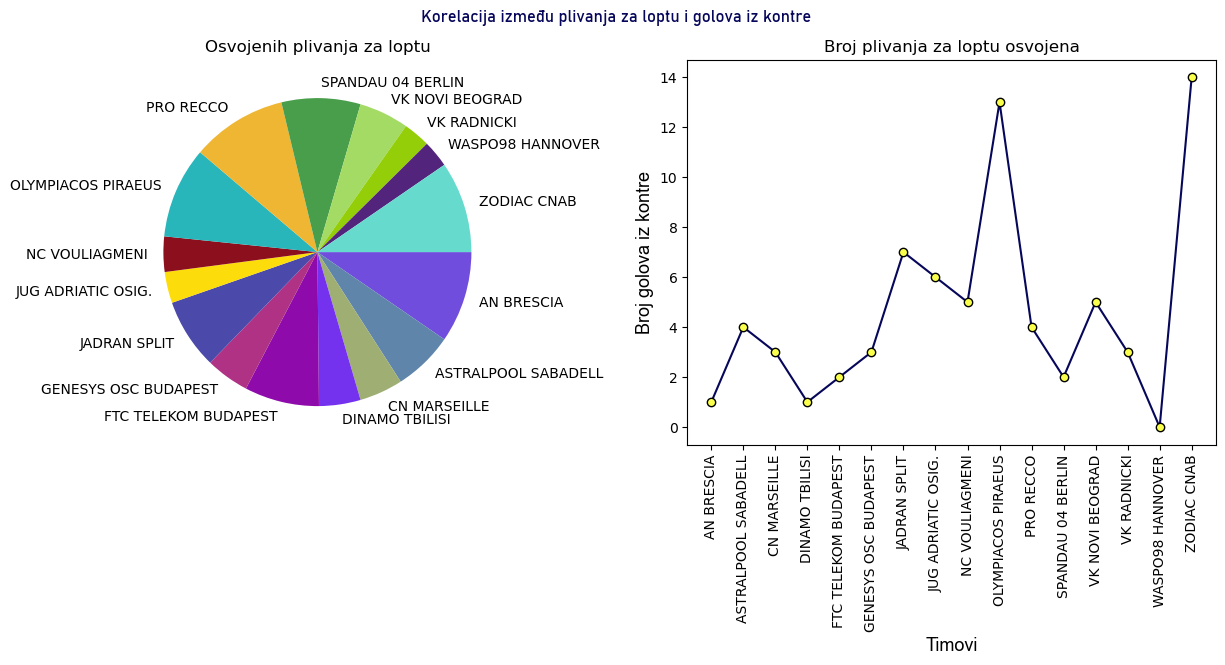

In [397]:
#Pie chart of sprints won
sprint_pie = plt
sprint_y = grouped_data['SpW']
counter_y = grouped_data['CoG']
sprint_label = grouped_data.index
colors_sprint = []
for t in sprint_label:
    colors_sprint.append("#%06x" % np.random.randint(0, 0xFFFFFF))

#Comperison of sprints won and counter attack goals
sprint_pie.figure(figsize=(15,5))
sprint_pie.subplot(1,2,1)
sprint_pie.pie(sprint_y, labels = sprint_label, startangle = 0, rotatelabels = False, colors = colors_sprint, counterclock=False)
#sprint_pie.xticks(rotation = 45)
sprint_pie.title('Osvojenih plivanja za loptu')


sprint_pie.subplot(1,2,2)
sprint_pie.plot(sprint_label,counter_y, c='#06065A', marker='o', mec='k', mfc='#FAFF4C')
sprint_pie.xticks(rotation = 90)
eff_goals.xlabel('Timovi', fontdict = font2)
eff_goals.ylabel('Broj golova iz kontre',fontdict = font2)
sprint_pie.title('Broj plivanja za loptu osvojena')

'''

sprint_pie.pie(sprint_y, labels = sprint_label, startangle = 0, rotatelabels = False, colors = colors_sprint, counterclock=False)
sprint_pie.xticks(rotation = 45)
#ex_ce.ylabel('Broj kontra faulova',fontdict = font2)
sprint_pie.suptitle('Broj plivanja za loptu osvojena', fontdict = font1)


sprint_pie.pie(sprint_y, labels = sprint_label, startangle = 0, rotatelabels = False, colors = colors_sprint, counterclock=False)
#sprint_pie.xticks(rotation = 45)
sprint_pie.title('Broj plivanja za loptu osvojena')'''

sprint_pie.suptitle('Korelacija između plivanja za loptu i golova iz kontre', fontdict = font1)
sprint_pie.show() 